In [90]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import re
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
import category_encoders as ce
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.cross_decomposition import PLSRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, mean_absolute_error
from sklearn.model_selection import cross_val_score



In [91]:
path_treino = 'data\cars_train.csv'
path_test = 'data\cars_test.csv'
dados_treino = pd.read_csv(path_treino)
dados_treino = dados_treino.drop(columns=['id', 'num_fotos','elegivel_revisao','dono_aceita_troca','entrega_delivery','cidade_vendedor'])

#transformando a colunas que tem NaN e informaçoes descritivas no modelo verdadeiro e falso como garatia de fabriga para sim e não
dados_treino.loc[dados_treino['garantia_de_fábrica'].notnull(),'garantia_de_fábrica'] = 'S'
dados_treino.loc[dados_treino['garantia_de_fábrica'].isnull(),'garantia_de_fábrica'] = 'N'

#transformando os dados veiculo unico dono
dados_treino.loc[dados_treino['veiculo_único_dono'].notnull(),'veiculo_único_dono'] = 'S'
dados_treino.loc[dados_treino['veiculo_único_dono'].isnull(),'veiculo_único_dono'] = 'N'

#ipva_pago
dados_treino.loc[dados_treino['ipva_pago'].notnull(),'ipva_pago'] = 'S'
dados_treino.loc[dados_treino['ipva_pago'].isnull(),'ipva_pago'] = 'N'

#veiculo_licenciado	
dados_treino.loc[dados_treino['veiculo_licenciado'].notnull(),'veiculo_licenciado'] = 'S'
dados_treino.loc[dados_treino['veiculo_licenciado'].isnull(),'veiculo_licenciado'] = 'N'

#garantia_de_fábrica
dados_treino.loc[dados_treino['garantia_de_fábrica'].notnull(),'garantia_de_fábrica'] = 'S'
dados_treino.loc[dados_treino['garantia_de_fábrica'].isnull(),'garantia_de_fábrica'] = 'N'

#revisoes_dentro_agenda
dados_treino.loc[dados_treino['revisoes_dentro_agenda'].notnull(),'revisoes_dentro_agenda'] = 'S'
dados_treino.loc[dados_treino['revisoes_dentro_agenda'].isnull(),'revisoes_dentro_agenda'] = 'N'

#revisoes_concessionaria
dados_treino.loc[dados_treino['revisoes_concessionaria'].notnull(),'revisoes_concessionaria'] = 'S'
dados_treino.loc[dados_treino['revisoes_concessionaria'].isnull(),'revisoes_concessionaria'] = 'N'

#veiculo_alienado
dados_treino.loc[dados_treino['veiculo_alienado'].notnull(),'veiculo_alienado'] = 'S'
dados_treino.loc[dados_treino['veiculo_alienado'].isnull(),'veiculo_alienado'] = 'N'


In [92]:
dados_treino['ano_atual'] = 2023
dados_treino['anos_de_fabricado'] = dados_treino['ano_atual'] - dados_treino['ano_de_fabricacao']
dados_treino.drop(['ano_atual'], inplace = True, axis = 1)
dados_treino.drop(['ano_de_fabricacao'], inplace = True, axis = 1)

dados_treino

,marca,modelo,versao,ano_modelo,hodometro,cambio,num_portas,tipo,blindado,cor,...,troca,veiculo_único_dono,revisoes_concessionaria,ipva_pago,veiculo_licenciado,garantia_de_fábrica,revisoes_dentro_agenda,veiculo_alienado,preco,anos_de_fabricado
0,NISSAN,KICKS,1.6 16V FLEXSTART SL 4P XTRONIC,2017,67772,CVT,4,Sedã,N,Branco,...,False,N,S,S,S,S,N,N,74732.59008,6
1,JEEP,COMPASS,2.0 16V FLEX LIMITED AUTOMÁTICO,2017,62979,Automática,4,Sedã,N,Branco,...,False,N,N,S,N,S,N,N,81965.33263,6
2,KIA,SORENTO,2.4 16V GASOLINA EX 7L AWD AUTOMÁTICO,2019,44070,Automática,4,Sedã,N,Preto,...,False,N,N,N,N,S,N,N,162824.81450,5
3,VOLKSWAGEN,AMAROK,2.0 HIGHLINE 4X4 CD 16V TURBO INTERCOOLER DIES...,2015,85357,Automática,4,Picape,N,Branco,...,True,N,N,S,S,S,N,N,123681.35890,10
4,SSANGYONG,KORANDO,2.0 GLS 4X4 16V TURBO DIESEL 4P AUTOMÁTICO,2015,71491,Automática,4,Utilitário esportivo,N,Preto,...,False,N,S,N,N,S,S,N,82419.76389,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29579,TOYOTA,HILUX,2.8 D-4D TURBO DIESEL CD SRX 4X4 AUTOMÁTICO,2021,8150,Automática,4,Picape,N,Branco,...,False,S,N,S,S,S,N,N,403015.28960,2
29580,VOLKSWAGEN,POLO,1.0 200 TSI HIGHLINE AUTOMÁTICO,2020,17987,Automática,4,Picape,N,Branco,...,False,S,S,S,S,S,N,N,88978.08050,3
29581,TOYOTA,HILUX,2.8 SRX 4X4 CD 16V DIESEL 4P AUTOMÁTICO,2019,44742,Automática,4,Picape,N,Cinza,...,False,N,N,N,N,S,N,N,218807.64870,4
29582,PEUGEOT,2008,1.6 16V FLEX ALLURE PACK 4P AUTOMÁTICO,2022,35376,Automática,4,Sedã,N,Branco,...,False,S,N,S,S,S,N,N,68495.99069,2


Não há nenhum carro apenas a alcool
Vamos extrair informaçoes da coluna versão e expandilas em colunas 4x4, valvuvlas, cilindradas e combustível 

In [93]:
s = '2.8 D-4D TURBO DIESEL CD SRX 4X4 AUTOMÁTICO'
reg_cilindrada = r'([0-9]\.[0-9])'
reg_4x4= r'([0-9]X[0-9])'
num = re.findall(reg_4x4,s) 

print(num)

['4X4']


In [94]:
def classifica_valvulas(x):
    x = x.replace('V','')
    x = int(x)
    
    if x < 17:
        return 'A'
    elif x < 31:
        return 'B'
    else:
        return 'C'

In [95]:
reg_cilindrada = r'([0-9]\.[0-9])'
reg_4x4= r'([0-9]X[0-9])'

dados_treino['cilindrada'] = dados_treino['versao'].str.extract(reg_cilindrada)
dados_treino['4X4'] = dados_treino['versao'].str.count(reg_4x4)
dados_treino['combutivel'] = dados_treino['versao'].str.extract(r'(FLEX|GASOLINA|DIESEL)')
dados_treino['valvulas'] = dados_treino['versao'].str.extract(r'(\d+V)')


limpando os dados NAN introduzidos ao dividir a coluna versão

Para o número de valvulas 8V é o padrão de mercado, portanto assumimos que os motores não especifiados tem 8V
Para o combustível, assumimos o motor flex que é o padrão hoje de mercado

In [96]:
dados_treino = dados_treino.drop('versao',axis=1)
dados_treino['valvulas'] = dados_treino['valvulas'].fillna('8V')
dados_treino['valvulas_categoria'] = dados_treino['valvulas'].apply(classifica_valvulas)
dados_treino = dados_treino.drop(columns=['valvulas'])
dados_treino['combutivel'] = dados_treino['combutivel'].fillna(value='FLEX')
dados_treino

,marca,modelo,ano_modelo,hodometro,cambio,num_portas,tipo,blindado,cor,tipo_vendedor,...,veiculo_licenciado,garantia_de_fábrica,revisoes_dentro_agenda,veiculo_alienado,preco,anos_de_fabricado,cilindrada,4X4,combutivel,valvulas_categoria
0,NISSAN,KICKS,2017,67772,CVT,4,Sedã,N,Branco,PF,...,S,S,N,N,74732.59008,6,1.6,0,FLEX,A
1,JEEP,COMPASS,2017,62979,Automática,4,Sedã,N,Branco,PF,...,N,S,N,N,81965.33263,6,2.0,0,FLEX,A
2,KIA,SORENTO,2019,44070,Automática,4,Sedã,N,Preto,PJ,...,N,S,N,N,162824.81450,5,2.4,0,GASOLINA,A
3,VOLKSWAGEN,AMAROK,2015,85357,Automática,4,Picape,N,Branco,PJ,...,S,S,N,N,123681.35890,10,2.0,1,DIESEL,A
4,SSANGYONG,KORANDO,2015,71491,Automática,4,Utilitário esportivo,N,Preto,PF,...,N,S,S,N,82419.76389,10,2.0,1,DIESEL,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29579,TOYOTA,HILUX,2021,8150,Automática,4,Picape,N,Branco,PF,...,S,S,N,N,403015.28960,2,2.8,1,DIESEL,A
29580,VOLKSWAGEN,POLO,2020,17987,Automática,4,Picape,N,Branco,PF,...,S,S,N,N,88978.08050,3,1.0,0,FLEX,A
29581,TOYOTA,HILUX,2019,44742,Automática,4,Picape,N,Cinza,PF,...,N,S,N,N,218807.64870,4,2.8,1,DIESEL,A
29582,PEUGEOT,2008,2022,35376,Automática,4,Sedã,N,Branco,PJ,...,S,S,N,N,68495.99069,2,1.6,0,FLEX,A


In [97]:
X = dados_treino.drop(['preco'], axis = 1)
y = dados_treino['preco']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 3)

In [98]:
encoder = ce.TargetEncoder(cols = 'marca')
encoder.fit(X_train['marca'], y_train.to_frame()['preco'])
X_train['marca'] = encoder.transform(X_train['marca'])
X_test['marca'] = encoder.transform(X_test['marca'])

X_train.head()

,marca,modelo,ano_modelo,hodometro,cambio,num_portas,tipo,blindado,cor,tipo_vendedor,...,ipva_pago,veiculo_licenciado,garantia_de_fábrica,revisoes_dentro_agenda,veiculo_alienado,anos_de_fabricado,cilindrada,4X4,combutivel,valvulas_categoria
21301,84244.291924,SANTA FÉ,2017,67311,Automática,4,Sedã,N,Branco,PF,...,S,S,S,S,N,7,3.3,1,GASOLINA,A
12859,159395.628953,Q3,2018,48954,Automática,4,Sedã,N,Preto,PF,...,S,S,S,S,N,5,2.0,0,GASOLINA,A
29371,139120.140628,RENEGADE,2017,78139,Automática,4,Utilitário esportivo,N,Branco,PJ,...,N,N,S,N,N,7,2.0,1,DIESEL,A
12908,99488.172737,STRADA,2021,22848,Manual,2,Picape,N,Branco,PJ,...,S,S,S,N,N,2,1.4,0,FLEX,A
18030,118506.903147,VIRTUS,2019,37886,Automática,4,Sedã,N,Branco,PF,...,N,N,S,N,N,4,1.0,0,FLEX,A


In [99]:
encoder = ce.TargetEncoder(cols = 'modelo')
encoder.fit(X_train['modelo'], y_train.to_frame()['preco'])
X_train['modelo'] = encoder.transform(X_train['modelo'])
X_test['modelo'] = encoder.transform(X_test['modelo'])

X_train.head()

,marca,modelo,ano_modelo,hodometro,cambio,num_portas,tipo,blindado,cor,tipo_vendedor,...,ipva_pago,veiculo_licenciado,garantia_de_fábrica,revisoes_dentro_agenda,veiculo_alienado,anos_de_fabricado,cilindrada,4X4,combutivel,valvulas_categoria
21301,84244.291924,104048.283381,2017,67311,Automática,4,Sedã,N,Branco,PF,...,S,S,S,S,N,7,3.3,1,GASOLINA,A
12859,159395.628953,146452.688237,2018,48954,Automática,4,Sedã,N,Preto,PF,...,S,S,S,S,N,5,2.0,0,GASOLINA,A
29371,139120.140628,103544.019067,2017,78139,Automática,4,Utilitário esportivo,N,Branco,PJ,...,N,N,S,N,N,7,2.0,1,DIESEL,A
12908,99488.172737,72494.356163,2021,22848,Manual,2,Picape,N,Branco,PJ,...,S,S,S,N,N,2,1.4,0,FLEX,A
18030,118506.903147,76131.735171,2019,37886,Automática,4,Sedã,N,Branco,PF,...,N,N,S,N,N,4,1.0,0,FLEX,A


In [100]:
encoder = ce.TargetEncoder(cols = 'cor')
encoder.fit(X_train['cor'], y_train.to_frame()['preco'])
X_train['cor'] = encoder.transform(X_train['cor'])
X_test['cor'] = encoder.transform(X_test['cor'])

X_train.head()

,marca,modelo,ano_modelo,hodometro,cambio,num_portas,tipo,blindado,cor,tipo_vendedor,...,ipva_pago,veiculo_licenciado,garantia_de_fábrica,revisoes_dentro_agenda,veiculo_alienado,anos_de_fabricado,cilindrada,4X4,combutivel,valvulas_categoria
21301,84244.291924,104048.283381,2017,67311,Automática,4,Sedã,N,130684.347266,PF,...,S,S,S,S,N,7,3.3,1,GASOLINA,A
12859,159395.628953,146452.688237,2018,48954,Automática,4,Sedã,N,136000.067554,PF,...,S,S,S,S,N,5,2.0,0,GASOLINA,A
29371,139120.140628,103544.019067,2017,78139,Automática,4,Utilitário esportivo,N,130684.347266,PJ,...,N,N,S,N,N,7,2.0,1,DIESEL,A
12908,99488.172737,72494.356163,2021,22848,Manual,2,Picape,N,130684.347266,PJ,...,S,S,S,N,N,2,1.4,0,FLEX,A
18030,118506.903147,76131.735171,2019,37886,Automática,4,Sedã,N,130684.347266,PF,...,N,N,S,N,N,4,1.0,0,FLEX,A


In [101]:
for col in X_train.columns:
    print(col)

marca
modelo
ano_modelo
hodometro
cambio
num_portas
tipo
blindado
cor
tipo_vendedor
estado_vendedor
anunciante
troca
veiculo_único_dono
revisoes_concessionaria
ipva_pago
veiculo_licenciado
garantia_de_fábrica
revisoes_dentro_agenda
veiculo_alienado
anos_de_fabricado
cilindrada
4X4
combutivel
valvulas_categoria


In [102]:
encoder = ce.OneHotEncoder()
encoder.fit(X_train[['valvulas_categoria', 'combutivel', '4X4', 'cilindrada', 'cambio','ano_modelo','num_portas','tipo','blindado']])
one_hot_encoded_train = encoder.transform(X_train[['valvulas_categoria', 'combutivel', '4X4', 'cilindrada', 'cambio','ano_modelo','num_portas','tipo','blindado']])
one_hot_encoded_test = encoder.transform(X_test[['valvulas_categoria', 'combutivel', '4X4', 'cilindrada', 'cambio','ano_modelo','num_portas','tipo','blindado']])

checando se os X_train/test e one_hot_coded_train/test pertencem a mesma classe para poder realizar uma concatenação

In [103]:
print(type(X_train))
print(type(one_hot_encoded_train))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [104]:
X_train = pd.concat([X_train, one_hot_encoded_train], axis = 1)
X_test = pd.concat([X_test, one_hot_encoded_test], axis = 1)

In [105]:
X_train.drop(['combutivel', '4X4', 'cilindrada', 'cambio','ano_modelo','num_portas','tipo','blindado','valvulas_categoria'],axis=1,inplace=True)
X_test.drop(['combutivel', '4X4', 'cilindrada', 'cambio','ano_modelo','num_portas','tipo','blindado','valvulas_categoria'],axis=1,inplace=True)

X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23667 entries, 21301 to 5994
Data columns (total 83 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   marca                    23667 non-null  float64
 1   modelo                   23667 non-null  float64
 2   hodometro                23667 non-null  int64  
 3   cor                      23667 non-null  float64
 4   tipo_vendedor            23667 non-null  object 
 5   estado_vendedor          23667 non-null  object 
 6   anunciante               23667 non-null  object 
 7   troca                    23667 non-null  bool   
 8   veiculo_único_dono       23667 non-null  object 
 9   revisoes_concessionaria  23667 non-null  object 
 10  ipva_pago                23667 non-null  object 
 11  veiculo_licenciado       23667 non-null  object 
 12  garantia_de_fábrica      23667 non-null  object 
 13  revisoes_dentro_agenda   23667 non-null  object 
 14  veiculo_alienado   

In [106]:
encoder = ce.OneHotEncoder()
encoder.fit(X_train[['tipo_vendedor', 'estado_vendedor', 'anunciante', 'troca','veiculo_único_dono','revisoes_concessionaria','ipva_pago','veiculo_licenciado','garantia_de_fábrica','revisoes_dentro_agenda','veiculo_alienado']])
one_hot_encoded_train = encoder.transform(X_train[['tipo_vendedor', 'estado_vendedor', 'anunciante', 'troca','veiculo_único_dono','revisoes_concessionaria','ipva_pago','veiculo_licenciado','garantia_de_fábrica','revisoes_dentro_agenda','veiculo_alienado']])
one_hot_encoded_test = encoder.transform(X_test[['tipo_vendedor', 'estado_vendedor', 'anunciante', 'troca','veiculo_único_dono','revisoes_concessionaria','ipva_pago','veiculo_licenciado','garantia_de_fábrica','revisoes_dentro_agenda','veiculo_alienado']])
X_train = pd.concat([X_train, one_hot_encoded_train], axis = 1)
X_test = pd.concat([X_test, one_hot_encoded_test], axis = 1)

In [107]:
X_train.drop(['tipo_vendedor', 'estado_vendedor', 'anunciante', 'troca','veiculo_único_dono','revisoes_concessionaria','ipva_pago','veiculo_licenciado','garantia_de_fábrica','revisoes_dentro_agenda','veiculo_alienado'],axis=1,inplace=True)
X_test.drop(['tipo_vendedor', 'estado_vendedor', 'anunciante', 'troca','veiculo_único_dono','revisoes_concessionaria','ipva_pago','veiculo_licenciado','garantia_de_fábrica','revisoes_dentro_agenda','veiculo_alienado'],axis=1,inplace=True)
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23667 entries, 21301 to 5994
Columns: 115 entries, marca to veiculo_alienado_1
dtypes: float64(3), int64(112)
memory usage: 20.9 MB


In [108]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_new = scaler.transform(X_train)
X_test_new = scaler.transform(X_test)

X_train_new.shape

(23667, 115)

In [109]:
error_mean_square = []
error_mean_absolute = []
r2 = []

##Linear Regression

In [110]:
model = LinearRegression()
model.fit(X_train_new, y_train)
y_predict = model.predict(X_test_new)


#Guardando os valores dos erros
error_mean_square.append(int(mean_squared_error(y_predict, y_test)))
error_mean_absolute.append(int(mean_absolute_error(y_predict, y_test)))
r2score = r2_score(y_predict, y_test)
r2.append(r2score)

error_mean_absolute

[32839]

In [111]:
y_predict = pd.DataFrame(y_predict, columns = ['valor_previsto'])
y_predict.head(10)


,valor_previsto
0,99968.0
1,31384.0
2,91136.0
3,93984.0
4,65400.0
5,120504.0
6,177544.0
7,123696.0
8,77168.0
9,173952.0


In [112]:
y_test.to_frame().head(10)

,preco
9995,56742.94724
26042,32005.52256
27660,72595.04995
17292,53365.33791
6084,65758.81110
24186,127436.89140
28162,108903.86070
28121,101709.47450
23993,152061.18990
9742,163617.91020


In [113]:
resultados = pd.concat([y_predict, y_test.to_frame().reset_index(drop = True)], axis = 1, ignore_index = False)
resultados.head()


,valor_previsto,preco
0,99968.0,56742.94724
1,31384.0,32005.52256
2,91136.0,72595.04995
3,93984.0,53365.33791
4,65400.0,65758.81110


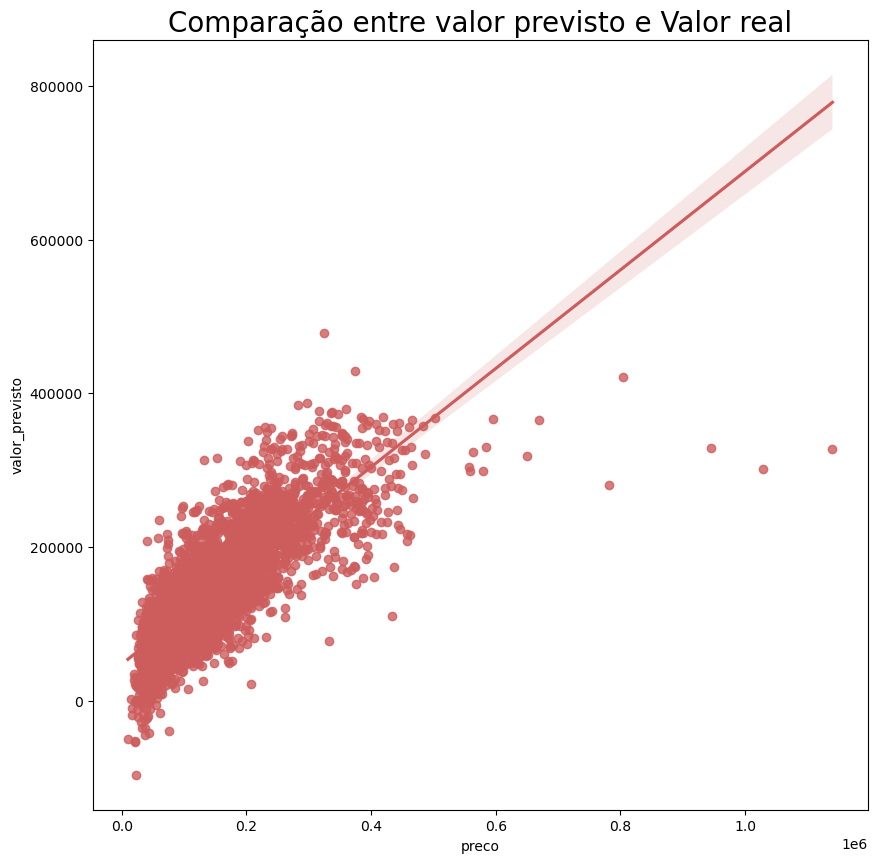

In [114]:
plt.figure(figsize = (10, 10))
sns.regplot(data = resultados, y = 'valor_previsto', x = 'preco', color = 'indianred', marker = 'o')
plt.title("Comparação entre valor previsto e Valor real", fontsize = 20)
plt.show()

#KNeighbors

In [115]:
model = KNeighborsRegressor(n_neighbors = 3)
model.fit(X_train_new, y_train)
y_predict = model.predict(X_test_new)
y_predict = pd.DataFrame(y_predict, columns = ['valor_previsto'])
resultados = pd.concat([y_predict, y_test.to_frame().reset_index(drop = True)], axis = 1, ignore_index = False)


error_mean_square.append(int(mean_squared_error(y_predict, y_test)))
error_mean_absolute.append(int(mean_absolute_error(y_predict, y_test)))
r2.append(r2_score(y_predict, y_test))

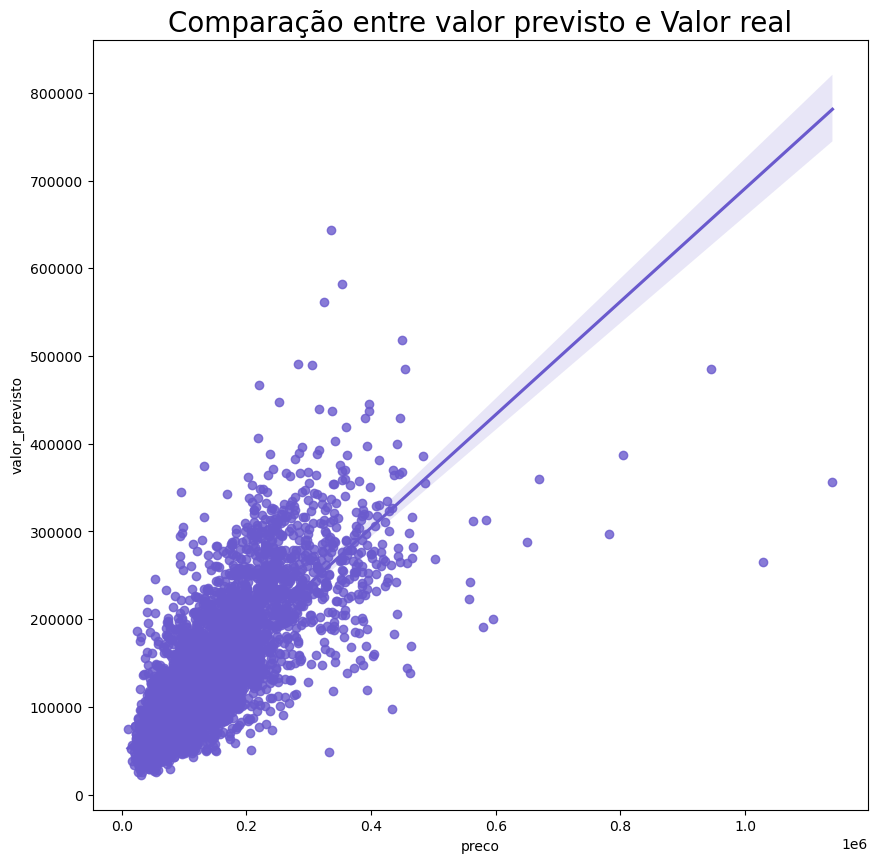

In [116]:
plt.figure(figsize = (10, 10))
sns.regplot(data = resultados, y = 'valor_previsto', x = 'preco', color = 'slateblue', marker = 'o')
plt.title("Comparação entre valor previsto e Valor real", fontsize = 20)
plt.show()

PLSRegression

In [117]:
model = PLSRegression(n_components = 20)
model.fit(X_train_new, y_train)
y_predict = model.predict(X_test_new)
y_predict = pd.DataFrame(y_predict, columns = ['valor_previsto'])
resultados = pd.concat([y_predict, y_test.to_frame().reset_index(drop = True)], axis = 1, ignore_index = False)


error_mean_square.append(int(mean_squared_error(y_predict, y_test)))
error_mean_absolute.append(int(mean_absolute_error(y_predict, y_test)))
r2score = r2_score(y_predict, y_test)
r2.append(r2score)

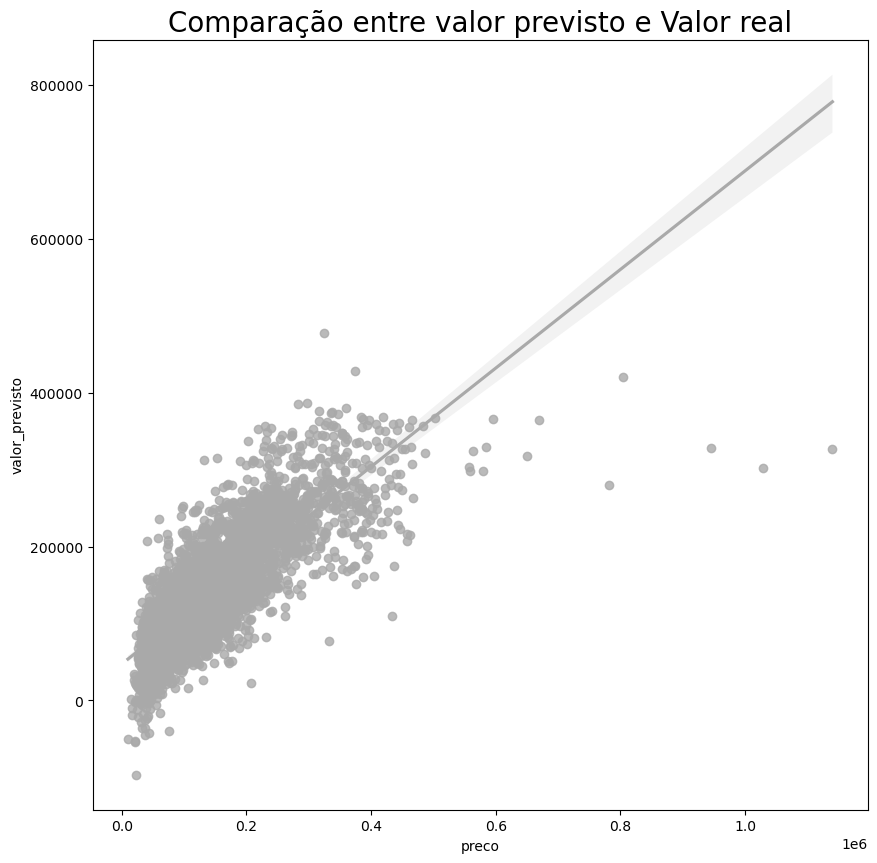

In [118]:
plt.figure(figsize = (10, 10))
sns.regplot(data = resultados, y = 'valor_previsto', x = 'preco', color = 'darkgray', marker = 'o')
plt.title("Comparação entre valor previsto e Valor real", fontsize = 20)
plt.show()

Desicion Tree

In [119]:
model = DecisionTreeRegressor(splitter = 'random')
model.fit(X_train_new, y_train)
y_predict = model.predict(X_test_new)
y_predict = pd.DataFrame(y_predict, columns = ['valor_previsto'])
resultados = pd.concat([y_predict, y_test.to_frame().reset_index(drop = True)], axis = 1, ignore_index = False)


error_mean_square.append(int(mean_squared_error(y_predict, y_test)))
error_mean_absolute.append(int(mean_absolute_error(y_predict, y_test)))
r2score = r2_score(y_predict, y_test)
r2.append(r2score)

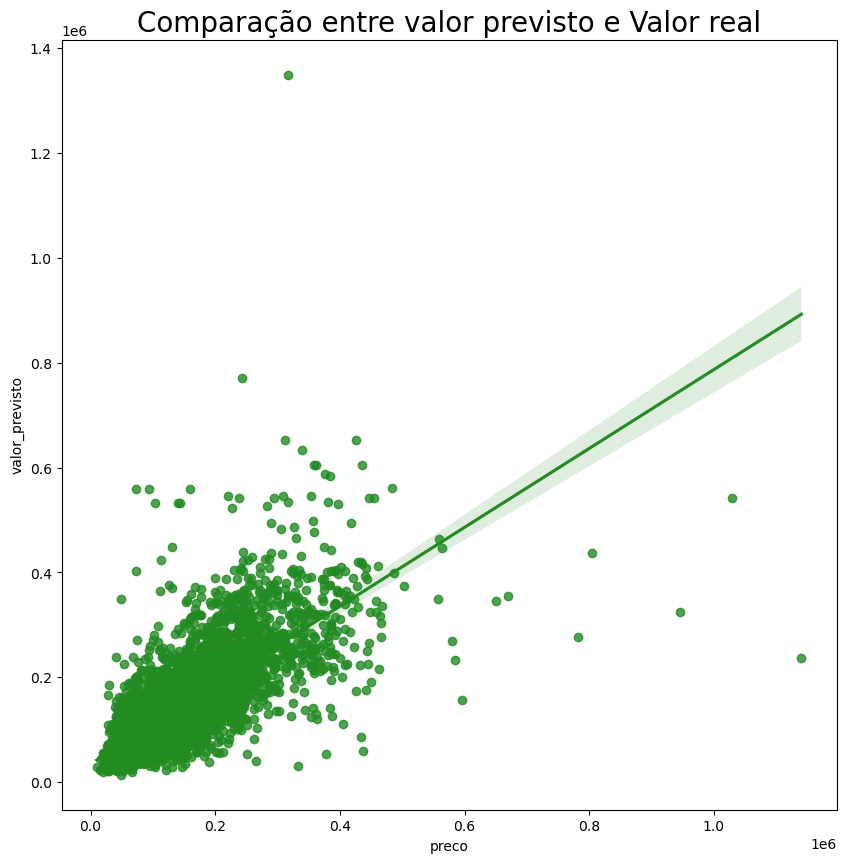

In [120]:
plt.figure(figsize = (10, 10))
sns.regplot(data = resultados, y = 'valor_previsto', x = 'preco', color = 'forestgreen', marker = 'o')
plt.title("Comparação entre valor previsto e Valor real", fontsize = 20)
plt.show()

Gradient Boosting Regressor

In [121]:
model = GradientBoostingRegressor()
model.fit(X_train_new, y_train)
y_predict = model.predict(X_test_new)
y_predict = pd.DataFrame(y_predict, columns = ['valor_previsto'])
resultados = pd.concat([y_predict, y_test.to_frame().reset_index(drop = True)], axis = 1, ignore_index = False)


error_mean_square.append(int(mean_squared_error(y_predict, y_test)))
error_mean_absolute.append(int(mean_absolute_error(y_predict, y_test)))
r2score = r2_score(y_predict, y_test)
r2.append(r2score)


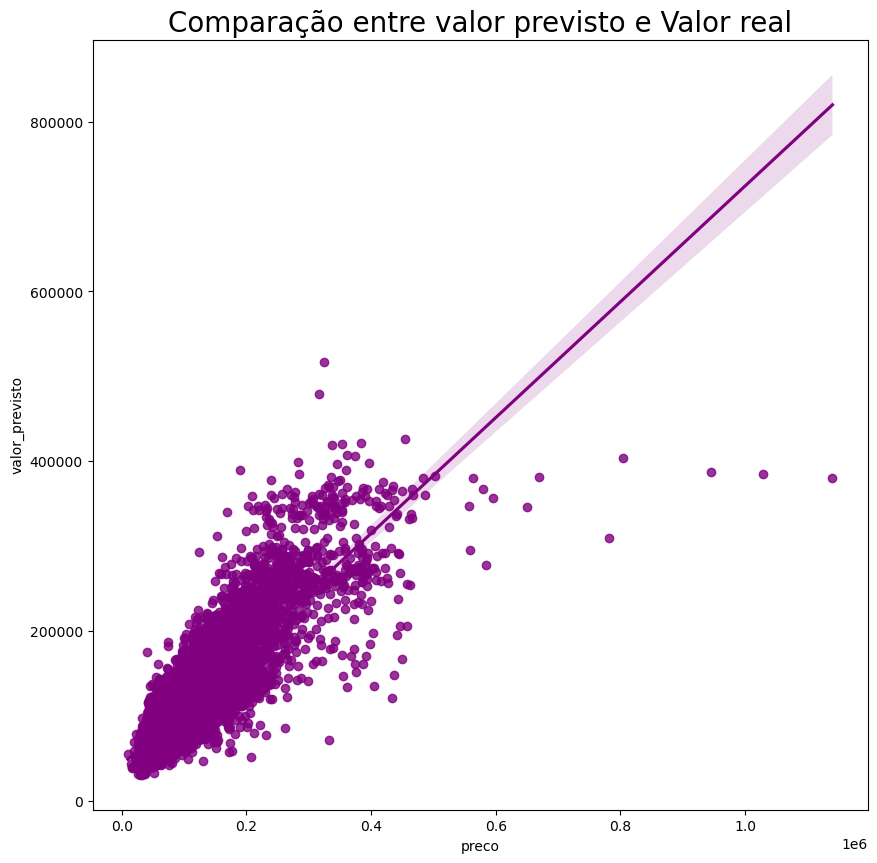

In [122]:
plt.figure(figsize = (10, 10))
sns.regplot(data = resultados, y = 'valor_previsto', x = 'preco', color = 'purple', marker = 'o')
plt.title("Comparação entre valor previsto e Valor real", fontsize = 20)
plt.show()

Analisando os modelos

In [123]:
data = {'Models': ['Regreção Linear', 'K Nearest Regressor', 'PLS Regression', 'Decision Tree Regressor', 'Gradient Boosting Regressor'], 'Mean Absolute Error': error_mean_absolute, 'Mean Squared Error': error_mean_square, 'R2 Score': r2}
model_dataframe = pd.DataFrame(data)
model_dataframe

,Models,Mean Absolute Error,Mean Squared Error,R2 Score
0,Regreção Linear,32839,2381408256,0.444802
1,K Nearest Regressor,33758,2748889346,0.415387
2,PLS Regression,32841,2381366793,0.444958
3,Decision Tree Regressor,37342,3598774676,0.486452
4,Gradient Boosting Regressor,29278,2004391482,0.551117


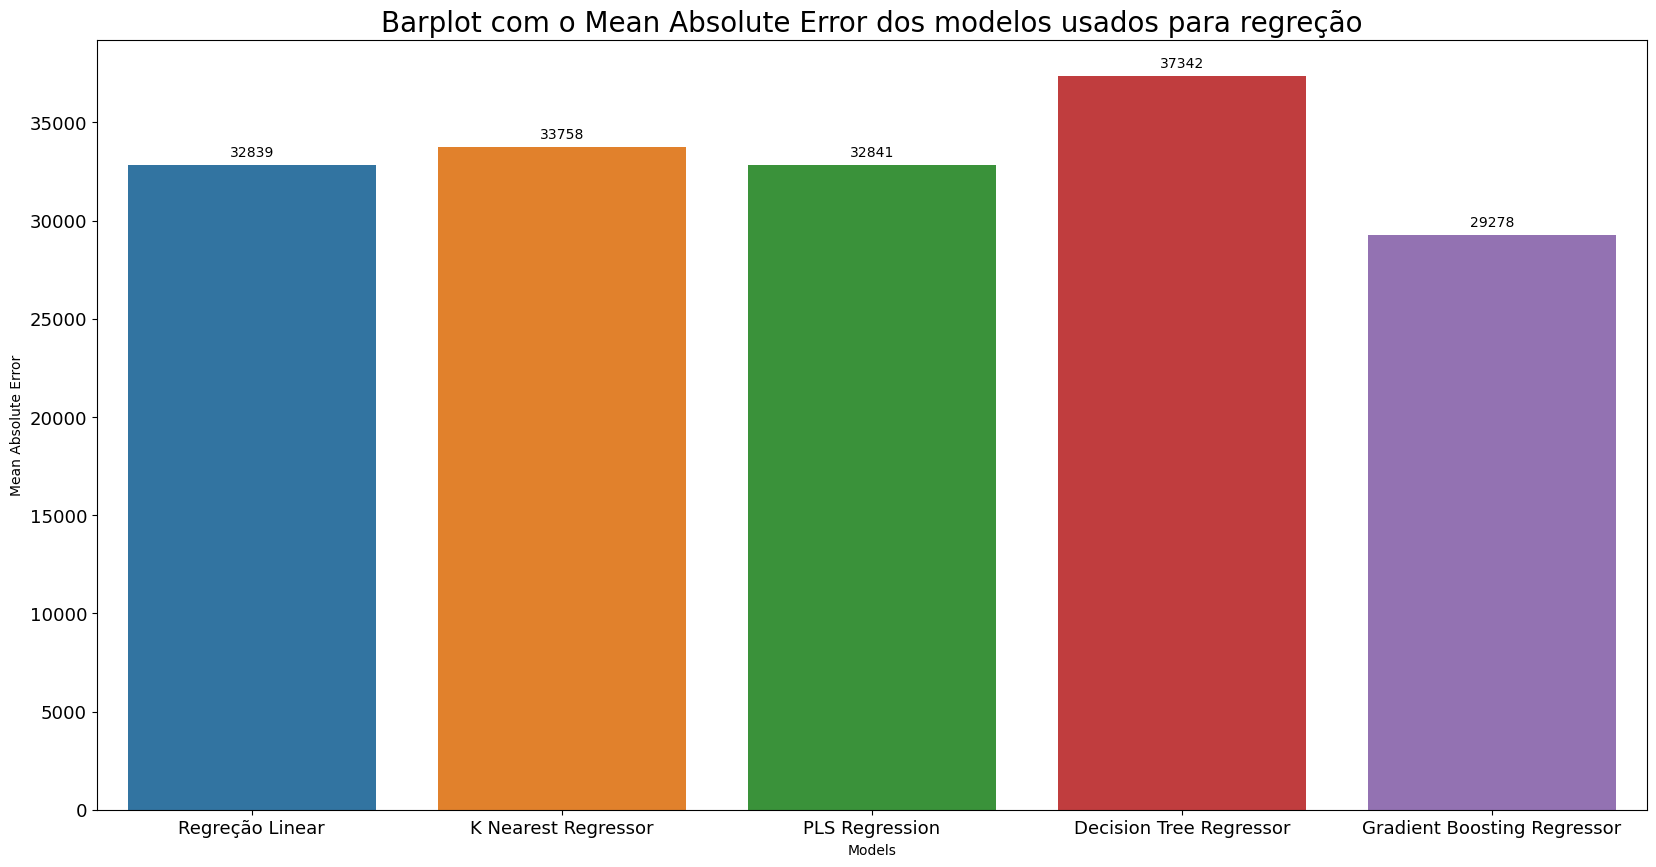

In [124]:
plt.figure(figsize = (20, 10))
splot = sns.barplot(data = model_dataframe, x = 'Models', y = 'Mean Absolute Error')
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.title('Barplot com o Mean Absolute Error dos modelos usados para regreção', fontsize = 20)
plt.show()  

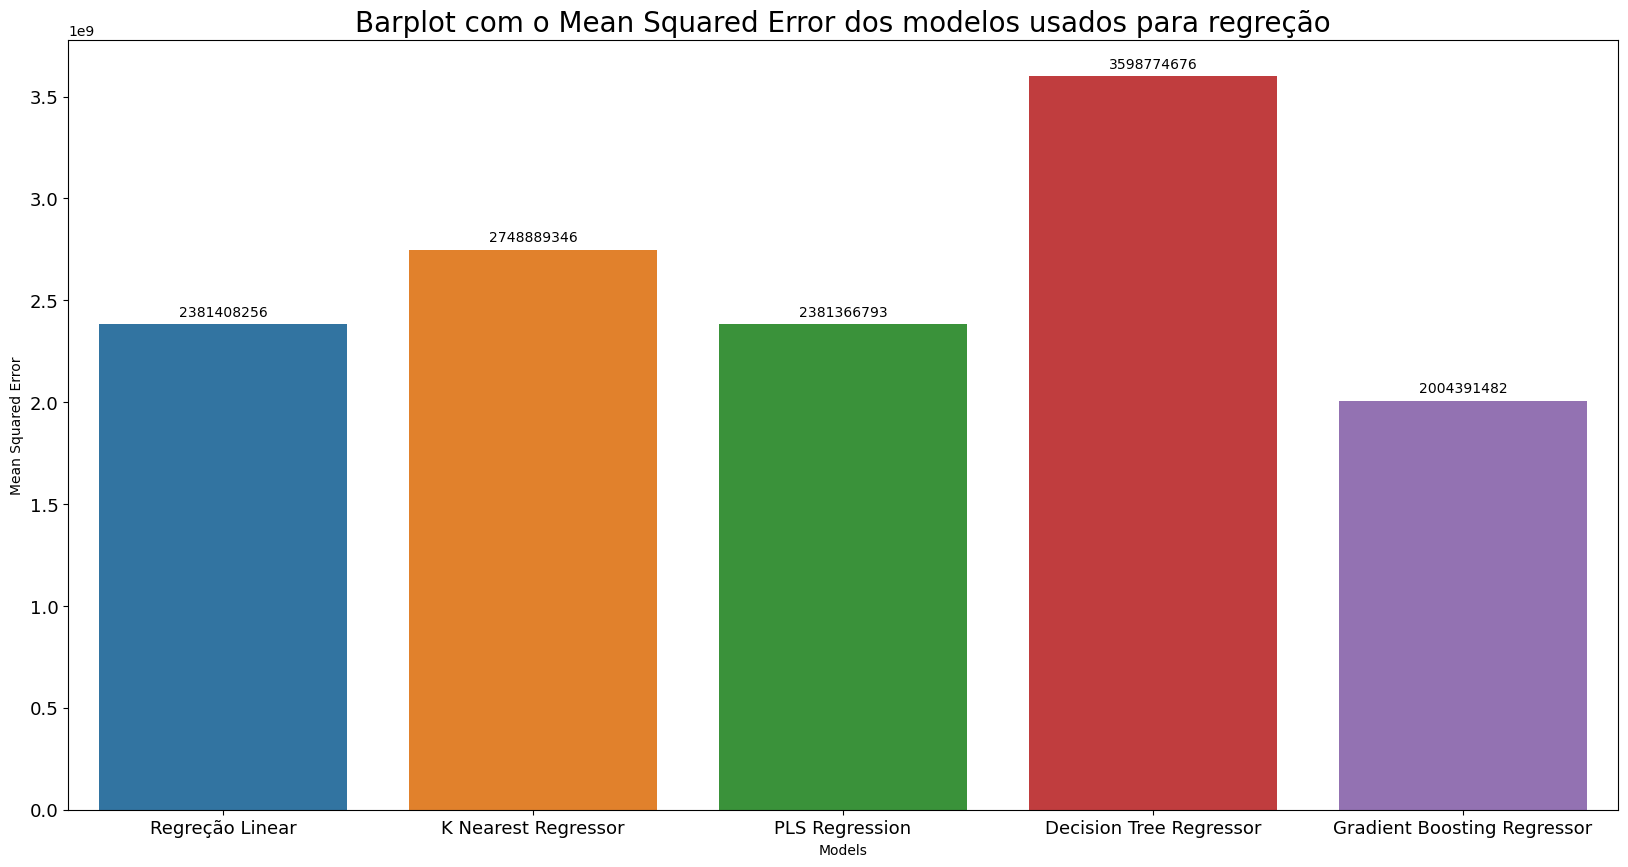

In [125]:
plt.figure(figsize = (20, 10))
splot = sns.barplot(data = model_dataframe, x = 'Models', y = 'Mean Squared Error')
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.title("Barplot com o Mean Squared Error dos modelos usados para regreção", fontsize = 20)
plt.show()  

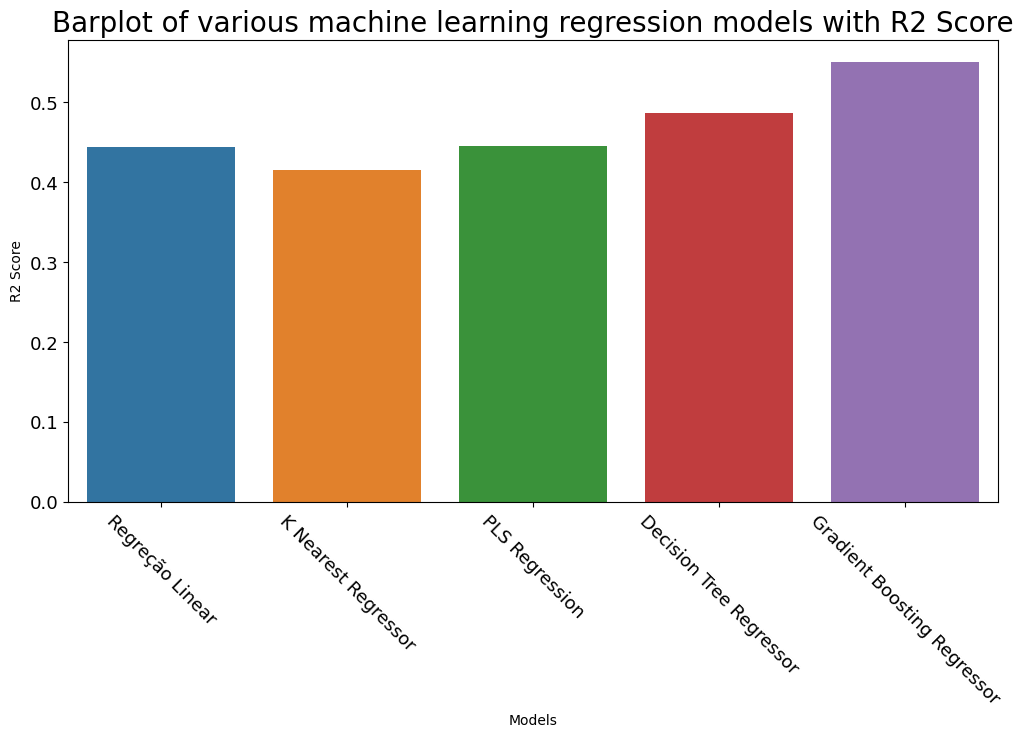

In [126]:
plt.figure(figsize = (12, 6))
splot = sns.barplot(data = model_dataframe, x = 'Models', y = 'R2 Score')

plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.title("Barplot of various machine learning regression models with R2 Score", fontsize = 20)
plt.tick_params(axis='x', rotation=-45)
plt.show()

Como Gradient boosting Regressor é o modelo que retorna o menor valor de desvio médio

In [127]:
X_train = dados_treino.drop(['preco'], axis = 1)
y_train = dados_treino['preco']

path_test = 'data\cars_test.csv'
dados_test = pd.read_csv(path_test)
dados_test = dados_test.drop(columns=['num_fotos','elegivel_revisao','dono_aceita_troca','entrega_delivery','cidade_vendedor'])

Preparando os dados para test

In [128]:
#transformando a colunas que tem NaN e informaçoes descritivas no modelo verdadeiro e falso como garatia de fabriga para sim e não
dados_test.loc[dados_test['garantia_de_fábrica'].notnull(),'garantia_de_fábrica'] = 'S'
dados_test.loc[dados_test['garantia_de_fábrica'].isnull(),'garantia_de_fábrica'] = 'N'

#transformando os dados veiculo unico dono
dados_test.loc[dados_test['veiculo_único_dono'].notnull(),'veiculo_único_dono'] = 'S'
dados_test.loc[dados_test['veiculo_único_dono'].isnull(),'veiculo_único_dono'] = 'N'

#ipva_pago
dados_test.loc[dados_test['ipva_pago'].notnull(),'ipva_pago'] = 'S'
dados_test.loc[dados_test['ipva_pago'].isnull(),'ipva_pago'] = 'N'

#veiculo_licenciado	
dados_test.loc[dados_test['veiculo_licenciado'].notnull(),'veiculo_licenciado'] = 'S'
dados_test.loc[dados_test['veiculo_licenciado'].isnull(),'veiculo_licenciado'] = 'N'

#garantia_de_fábrica
dados_test.loc[dados_test['garantia_de_fábrica'].notnull(),'garantia_de_fábrica'] = 'S'
dados_test.loc[dados_test['garantia_de_fábrica'].isnull(),'garantia_de_fábrica'] = 'N'

#revisoes_dentro_agenda
dados_test.loc[dados_test['revisoes_dentro_agenda'].notnull(),'revisoes_dentro_agenda'] = 'S'
dados_test.loc[dados_test['revisoes_dentro_agenda'].isnull(),'revisoes_dentro_agenda'] = 'N'

#revisoes_concessionaria
dados_test.loc[dados_test['revisoes_concessionaria'].notnull(),'revisoes_concessionaria'] = 'S'
dados_test.loc[dados_test['revisoes_concessionaria'].isnull(),'revisoes_concessionaria'] = 'N'

#veiculo_alienado
dados_test.loc[dados_test['veiculo_alienado'].notnull(),'veiculo_alienado'] = 'S'
dados_test.loc[dados_test['veiculo_alienado'].isnull(),'veiculo_alienado'] = 'N'

In [129]:
dados_test.head()

,id,marca,modelo,versao,ano_de_fabricacao,ano_modelo,hodometro,cambio,num_portas,tipo,...,estado_vendedor,anunciante,troca,veiculo_único_dono,revisoes_concessionaria,ipva_pago,veiculo_licenciado,garantia_de_fábrica,revisoes_dentro_agenda,veiculo_alienado
0,13518783164498355150900635905895481162,NISSAN,VERSA,1.6 16V FLEXSTART V-DRIVE MANUAL,2021,2021,20258,Manual,4,Hatchback,...,São Paulo (SP),Pessoa Física,False,N,N,S,S,S,N,N
1,299896161723793383246777788797566040330,FIAT,STRADA,1.4 MPI WORKING CS 8V FLEX 2P MANUAL,2021,2021,53045,Manual,2,Picape,...,Amazonas (AM),Loja,False,S,N,S,S,S,N,N
2,316180649972302128246133616457018378621,AUDI,Q5,2.0 TFSI GASOLINA BLACK S TRONIC,2018,2019,32486,Automática,4,Utilitário esportivo,...,Goiás (GO),Pessoa Física,False,N,N,S,N,S,N,N
3,222527157104148385909188217274642813298,CHEVROLET,CRUZE,1.4 TURBO LT 16V FLEX 4P AUTOMÁTICO,2019,2020,24937,Automática,4,Sedã,...,São Paulo (SP),Loja,False,S,N,S,S,S,N,N
4,160460343059850745858546502614838368036,FORD,ECOSPORT,1.5 TI-VCT FLEX SE AUTOMÁTICO,2019,2019,62074,Automática,4,Sedã,...,São Paulo (SP),Loja,False,N,N,S,S,S,N,N


In [130]:
dados_test['ano_atual'] = 2023
dados_test['anos_de_fabricado'] = dados_test['ano_atual'] - dados_test['ano_de_fabricacao']
dados_test.drop(['ano_atual'], inplace = True, axis = 1)
dados_test.drop(['ano_de_fabricacao'], inplace = True, axis = 1)
dados_test['cilindrada'] = dados_test['versao'].str.extract(reg_cilindrada)
dados_test['4X4'] = dados_test['versao'].str.count(reg_4x4)
dados_test['combutivel'] = dados_test['versao'].str.extract(r'(FLEX|GASOLINA|DIESEL)')
dados_test['valvulas'] = dados_test['versao'].str.extract(r'(\d+V)')
dados_test['valvulas'] = dados_test['valvulas'].fillna('8V')
dados_test['valvulas_categoria'] = dados_test['valvulas'].apply(classifica_valvulas)
dados_test = dados_test.drop(columns=['valvulas'])
dados_test['combutivel'] = dados_test['combutivel'].fillna(value='FLEX')
dados_test = dados_test.drop('versao',axis=1)

previsoes = dados_test['id']
X_test = dados_test.drop(columns=['id'], axis = 1)

Fazendo todos encodings

In [131]:
encoder = ce.TargetEncoder(cols = 'marca')
encoder.fit(X_train['marca'], y_train.to_frame()['preco'])
X_train['marca'] = encoder.transform(X_train['marca'])
X_test['marca'] = encoder.transform(X_test['marca'])
encoder = ce.TargetEncoder(cols = 'modelo')
encoder.fit(X_train['modelo'], y_train.to_frame()['preco'])
X_train['modelo'] = encoder.transform(X_train['modelo'])
X_test['modelo'] = encoder.transform(X_test['modelo'])
encoder = ce.TargetEncoder(cols = 'cor')
encoder.fit(X_train['cor'], y_train.to_frame()['preco'])
X_train['cor'] = encoder.transform(X_train['cor'])
X_test['cor'] = encoder.transform(X_test['cor'])
encoder = ce.OneHotEncoder()
encoder.fit(X_train[['valvulas_categoria', 'combutivel', '4X4', 'cilindrada', 'cambio','ano_modelo','num_portas','tipo','blindado']])
one_hot_encoded_train = encoder.transform(X_train[['valvulas_categoria', 'combutivel', '4X4', 'cilindrada', 'cambio','ano_modelo','num_portas','tipo','blindado']])
one_hot_encoded_test = encoder.transform(X_test[['valvulas_categoria', 'combutivel', '4X4', 'cilindrada', 'cambio','ano_modelo','num_portas','tipo','blindado']])

X_train = pd.concat([X_train, one_hot_encoded_train], axis = 1)
X_test = pd.concat([X_test, one_hot_encoded_test], axis = 1)

X_train.drop(['combutivel', '4X4', 'cilindrada', 'cambio','ano_modelo','num_portas','tipo','blindado','valvulas_categoria'],axis=1,inplace=True)
X_test.drop(['combutivel', '4X4', 'cilindrada', 'cambio','ano_modelo','num_portas','tipo','blindado','valvulas_categoria'],axis=1,inplace=True)

encoder = ce.OneHotEncoder()
encoder.fit(X_train[['tipo_vendedor', 'estado_vendedor', 'anunciante', 'troca','veiculo_único_dono','revisoes_concessionaria','ipva_pago','veiculo_licenciado','garantia_de_fábrica','revisoes_dentro_agenda','veiculo_alienado']])
one_hot_encoded_train = encoder.transform(X_train[['tipo_vendedor', 'estado_vendedor', 'anunciante', 'troca','veiculo_único_dono','revisoes_concessionaria','ipva_pago','veiculo_licenciado','garantia_de_fábrica','revisoes_dentro_agenda','veiculo_alienado']])
one_hot_encoded_test = encoder.transform(X_test[['tipo_vendedor', 'estado_vendedor', 'anunciante', 'troca','veiculo_único_dono','revisoes_concessionaria','ipva_pago','veiculo_licenciado','garantia_de_fábrica','revisoes_dentro_agenda','veiculo_alienado']])
X_train = pd.concat([X_train, one_hot_encoded_train], axis = 1)
X_test = pd.concat([X_test, one_hot_encoded_test], axis = 1)

X_train.drop(['tipo_vendedor', 'estado_vendedor', 'anunciante', 'troca','veiculo_único_dono','revisoes_concessionaria','ipva_pago','veiculo_licenciado','garantia_de_fábrica','revisoes_dentro_agenda','veiculo_alienado'],axis=1,inplace=True)
X_test.drop(['tipo_vendedor', 'estado_vendedor', 'anunciante', 'troca','veiculo_único_dono','revisoes_concessionaria','ipva_pago','veiculo_licenciado','garantia_de_fábrica','revisoes_dentro_agenda','veiculo_alienado'],axis=1,inplace=True)
X_train.info()

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_new = scaler.transform(X_train)
X_test_new = scaler.transform(X_test)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29584 entries, 0 to 29583
Columns: 115 entries, marca to veiculo_alienado_1
dtypes: float64(3), int64(112)
memory usage: 26.0 MB


In [132]:
model = GradientBoostingRegressor()
model.fit(X_train_new, y_train)
y_predict = model.predict(X_test_new)
y_predict = pd.DataFrame(y_predict, columns = ['valor_previsto'])
previsoes = pd.concat([previsoes,y_predict], axis = 1, ignore_index = False)


previsoes.head()

,id,valor_previsto
0,13518783164498355150900635905895481162,80836.612142
1,299896161723793383246777788797566040330,79047.996984
2,316180649972302128246133616457018378621,250312.393986
3,222527157104148385909188217274642813298,106274.202432
4,160460343059850745858546502614838368036,93000.970214


In [133]:
previsoes.to_csv('data/predicted.csv', encoding='utf-8', sep=';')